## Least-Square Linear Regression

You have heard about (linear) classification methods and least-squares linear regression in the lecture. 

__Task:__ Describe the difference between regression and classification in one sentence. 

In the next part, we want to implement a least-squares linear regression. This means that given a set of points $\{\mathbf{x_i},y_i\}$, $i = 1..N$, we want to find that line (or hyperplane in higher dimensions) which minimizes the least-square error. The least-squares error measures the quadratic distance from the predicted points by the linear model to the actual values.

The general formula of the least-squares regression is $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ where $\epsilon$ is a vector with dimensionality $\mathbb{R}^N$ containing the normally-distributed noise terms $N(0,\sigma^2)$, $\mathbf{y}$ is the vector of labels and $\mathbf{X}$ is the matrix of data points with dimensionality $\mathbb{R}^{NxD}$. We are interested in estimating the coefficients $\hat{\boldsymbol w}$ of the true coefficients $\boldsymbol w$. You saw in the lecture that the estimates are given by:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

where $\mathbf{X}$ is the matrix of regressor data (the first column is all 1’s for the intercept), and $\mathbf{y}$ is the vector of the dependent variable data. 

__Tasks:__ 
1.  Look at how the following data is generated. What are the real parameters of w?
2.  We want to implement a least-square linear regression now. Follow the following steps:
    1. ) Bring the data in the correct shape as requested by the formula above.    
    2. ) Calculate the estimates of the coefficients w.
    3. ) Add the resulting line to the given scatter plot of the data.
    4. ) Compute the mean squared-error of the residuals, i.e. $ \frac{1}{N}\sum_{i=1}^N \|y(x_i) - y_i \|^2$.
    5. ) Compare your results to the numpy built-in function np.linalg.lstsq(...)
3. Plot the residuals (e.g. using seaborn function residplot (you will need to install statsmodel with '_sudo pip3 install statsmodels_' ) and check the conditions of the linear regression.

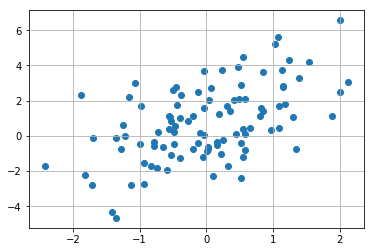

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Generate data
N_samples = 100
white_noise_stddev = 2
X = np.random.randn(N_samples,1)
eps = np.random.randn(N_samples,1)*white_noise_stddev
w = [1.3]
y = 0.5+w*X+eps

## Make Plot of the data
plt.scatter(X, y);
plt.grid()

In [8]:
X.shape, X[:4]

((100, 1), array([[ 0.808473  ],
        [ 0.57684411],
        [-0.19478179],
        [-0.73769397]]))

In [19]:
 ## B) Use the equation from above (X'X)^(-1)X'Y to calculate the estimate of the least-square coefficient:
# Hints:np.dot() computes the matrix-matrix product
#       np.linalg.inv() computes the matrix inverse
#       X.T is the transpose of X

In [9]:
## 2. A) Bring the data in the correct shape
nrow = len(X)
X_stacked= np.column_stack((np.ones(nrow),X))
 
## Verify that the X and Y arrays have the same number of rows so that the matrix multiplication works
print(X_stacked.shape)
print(y.shape)

(100, 2)
(100, 1)


In [10]:
X_stacked[:4]

array([[ 1.        ,  0.808473  ],
       [ 1.        ,  0.57684411],
       [ 1.        , -0.19478179],
       [ 1.        , -0.73769397]])

In [11]:
np.linalg.inv(np.dot(X_stacked.T,X_stacked))

array([[ 1.00000936e-02, -3.27301293e-05],
       [-3.27301293e-05,  1.14429636e-02]])

In [12]:
np.dot(X_stacked.T, y)

array([[ 73.97167861],
       [105.38642233]])

In [13]:
part1 = np.linalg.inv(np.dot(X_stacked.T,X_stacked))
part2 = np.dot(X_stacked.T, y)

In [14]:
w_hat = np.dot(part1, part2)
w_hat

array([[0.7362744 ],
       [1.20351189]])

In [31]:
def linearRegression(X, y):
    """  Computes the weights
    
    
    """
    nrow = len(X)
    X_stacked= np.column_stack((np.ones(nrow),X))
    part1 = np.linalg.inv(np.dot(X_stacked.T,X_stacked))
    part2 = np.dot(X_stacked.T, y)
    w_hat = np.dot(part1, part2)
    return w_hat

The estimator intercept is 0.74 and the estimated slope is 1.20.


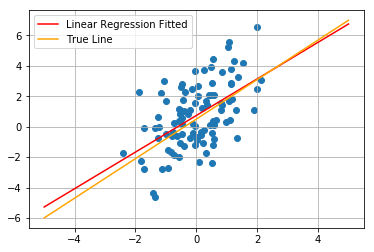

In [15]:
print("The estimator intercept is %.2f and the estimated slope is %.2f." % (w_hat[0],w_hat[1]))

## C) Plot the resulting line
plt.figure()
plt.plot([-5,5],np.dot([[1, -5], [1, 5]],w_hat),c='red',label='Linear Regression Fitted');
plt.plot([-5,5],np.dot([[1, -5], [1, 5]],[0.5,1.3]),c='orange',label='True Line');
plt.legend()
plt.scatter(X, y);
plt.grid()

In [16]:
## D) Compute the mean square-error (residual)
# (y - y_hat)**2
y_hat = np.dot(X_stacked,w_hat)
msr = np.square(y-y_hat)
msr.shape  # error for each data point 

(100, 1)

In [17]:
print("MSE is: %.2f" % ((sum(msr)[0])/nrow))

MSE is: 3.15


In [18]:
## E) Compare to built-in function
beta_builtin,residual,_,_ = np.linalg.lstsq(X_stacked, y)
print("MSE from built-in function is: %.2f " % (residual[0]/nrow))

MSE from built-in function is: 3.15 


/home/architect/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [24]:
!pip install statsmodels 

    100% |████████████████████████████████| 8.6MB 2.6MB/s ta 0:00:01
    100% |████████████████████████████████| 235kB 3.4MB/s ta 0:00:01
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
import seaborn as sns

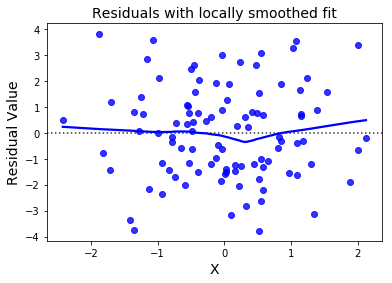

In [28]:
## 3) Plot the residuals
plt.figure()
sns.residplot(np.squeeze(X), np.squeeze(y), lowess=True,  color="b")
plt.xlabel('X',fontsize = 14)
plt.ylabel('Residual Value', fontsize = 14)
plt.title('Residuals with locally smoothed fit', fontsize = 14)
plt.show()

## Mathematical concepts of linear regression

We want to look more closely at the mathematical backgrounds of the least-square linear regression. One step before obtaining the final solution $\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$, one has the so-called normal equations: \begin{equation}
(\mathbf{X}^{\rm T}\mathbf{X}) \hat{\boldsymbol w} = \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

### Q3.1.1 Which condition on X has to be satisfied such that $(\mathbf{X}^{\rm T}\mathbf{X})$ can be inverted?

### Q3.1.2 Name scenarios in which this condition is violated.


In case, $(\mathbf{X}^{\rm T}\mathbf{X})$ is not invertible, one applies a so-called Moore-Penrose pseudoinverse. This is a generalization of the common matrix inversion to singular or non-quadratic matrices.

__Task__: Read about the pseudoinverse and list three properties of the pseudoinverse.

In [ ]:
Q3.1.1 

## The role of outliers in least-square linear regression 

Sometimes the data is not as clean as in the above case. In the following data set, we added one additional point [45,12] to the previous data set. We want to investigate how this point influences the estimates of $\mathbf w$ and find a strategy to avoid any occurring problems.

__Tasks:__
1. Apply a least square linear estimator to the new data set and visualize the results
2. Compare the estimator for w with the one from before.
3. Plot the residuals, i.e. the difference between the predicted variable $y(x_i)$ and real variable $y_i$.
4. In the lecture you have heard several conditions on the residual which should be satisfied for the linear regression. Check them in this case! 

__Hint__: You should re-run the simulation a few times to answer question number 4).

In [29]:
## Data Generation as before plus one outlier [45,12]
n = 100
white_noise_sd = 2
X = np.random.randn(n,1)
eps = np.random.randn(n,1)*white_noise_sd
w = [1.3]
y = 0.5+w*X+eps
X = np.append(X,45)
y = np.append(y,12)

# 1) Apply a least square linear estimator to the new data set

# 2) Compare estimator for w and visualize the results

# 3) Plot the residuals
# You can use the seaborn plot residplot (statsmodels package is necessary. Get it via: ""sudo pip3 install statsmodels"")

No handles with labels found to put in legend.


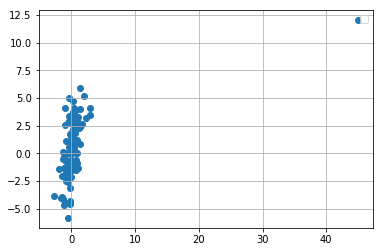

In [32]:
plt.legend()
plt.scatter(X, y);
plt.grid()

In [40]:
X[:-1]

array([-1.25470693, -0.90228624, -0.32067227,  1.95555867, -1.17641311,
       -0.07063298,  0.21590382, -0.7918733 , -0.17234314, -0.13432493,
       -0.24254791,  1.73847364, -0.83863005,  1.32026776,  0.32603544,
        0.25616587,  0.38673557,  0.2610878 , -0.60874026,  1.11983604,
       -0.56622503, -0.18442157,  0.86602559,  0.45487954,  0.47268058,
       -0.58760195, -0.51620568,  0.57666677, -1.94483953, -0.38236049,
       -0.9954694 ,  0.82308757, -0.80010186,  0.67836465, -0.97278965,
        0.44571858,  0.23106098, -0.72431079,  1.3358753 ,  0.86496594,
        0.33204872,  0.17334369, -0.09821184,  0.54781369,  0.65177938,
       -0.36274124, -0.02022347, -0.27778569, -0.52465801, -1.12173532,
       -0.30903034,  0.2957412 ,  1.41853924,  2.85590927,  0.48377729,
        1.07485338, -0.17714241, -0.86049625,  0.02376108, -2.75505029,
       -1.53504854, -1.27434415,  0.72261157,  0.5896947 , -1.30854833,
       -0.35424634,  0.02735628,  1.07625463,  0.3562041 ,  0.82

In [39]:
X

array([-1.25470693e+00, -9.02286239e-01, -3.20672268e-01,  1.95555867e+00,
       -1.17641311e+00, -7.06329806e-02,  2.15903823e-01, -7.91873303e-01,
       -1.72343137e-01, -1.34324934e-01, -2.42547911e-01,  1.73847364e+00,
       -8.38630047e-01,  1.32026776e+00,  3.26035436e-01,  2.56165867e-01,
        3.86735574e-01,  2.61087802e-01, -6.08740259e-01,  1.11983604e+00,
       -5.66225025e-01, -1.84421573e-01,  8.66025594e-01,  4.54879538e-01,
        4.72680582e-01, -5.87601946e-01, -5.16205681e-01,  5.76666770e-01,
       -1.94483953e+00, -3.82360488e-01, -9.95469395e-01,  8.23087571e-01,
       -8.00101864e-01,  6.78364654e-01, -9.72789649e-01,  4.45718579e-01,
        2.31060981e-01, -7.24310790e-01,  1.33587530e+00,  8.64965936e-01,
        3.32048722e-01,  1.73343692e-01, -9.82118398e-02,  5.47813687e-01,
        6.51779375e-01, -3.62741240e-01, -2.02234720e-02, -2.77785694e-01,
       -5.24658008e-01, -1.12173532e+00, -3.09030341e-01,  2.95741200e-01,
        1.41853924e+00,  

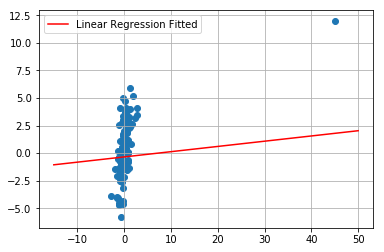

In [35]:
# 1) Apply a least square linear estimator to the new data set
w_hat = linearRegression(X, y)
plt.figure()
plt.plot([-15,50],np.dot([[1, -5], [1, 5]],w_hat),c='red',label='Linear Regression Fitted');
plt.legend()
plt.scatter(X, y);
plt.grid()

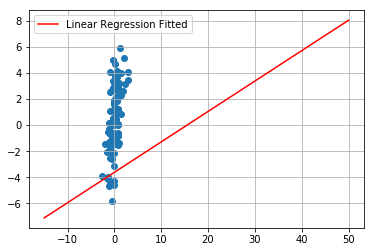

In [42]:
# 1) Apply a least square linear estimator to the new data set
X_less = X[:-1]
y_less = y[:-1]
w_hat = linearRegression(X_less, y_less)
plt.figure()
plt.plot([-15,50],np.dot([[1, -5], [1, 5]],w_hat),c='red',label='Linear Regression Fitted');
plt.legend()
plt.scatter(X_less, y_less);
plt.grid()

In [47]:
res_error

array([3.50855151e-03, 7.86116027e-01, 2.12249016e+01, 1.65043251e+01,
       1.98862506e-01, 1.32051356e+00, 1.71656041e+01, 8.53657553e-01,
       2.24038797e+01, 1.10297932e+00, 5.27545285e-01, 2.61501938e+00,
       7.64153630e+00, 2.10685685e+00, 2.54186838e+00, 1.51834914e-01,
       1.98801630e+00, 3.91477162e-01, 1.67827845e+00, 1.97615887e+00,
       3.76726949e+01, 1.77139991e+00, 4.78472903e-01, 9.46070928e+00,
       1.75513410e+00, 5.82028475e+00, 8.43892354e+00, 9.92395690e+00,
       1.73243287e+00, 3.39123454e+00, 5.74892329e+00, 4.44605146e+00,
       7.40124771e-01, 4.91264662e+00, 2.18494335e+01, 2.03327676e+00,
       1.01553434e+01, 9.17707929e-01, 9.66255282e+00, 2.12058349e-01,
       1.07777050e-02, 1.84098710e-01, 2.33422972e-01, 1.91727030e+00,
       1.89221131e-01, 5.51211668e+00, 1.30841470e+00, 1.03196766e-03,
       5.72498862e+00, 2.12681469e+00, 6.17164244e+00, 5.28392014e-02,
       5.72562922e-03, 4.39102095e+00, 1.21741453e+01, 5.94012096e+00,
      

(array([56., 22.,  7.,  3.,  6.,  3.,  3.,  0.,  0.,  1.]),
 array([1.03196766e-03, 3.76819826e+00, 7.53536455e+00, 1.13025308e+01,
        1.50696971e+01, 1.88368634e+01, 2.26040297e+01, 2.63711960e+01,
        3.01383623e+01, 3.39055286e+01, 3.76726949e+01]),
 <a list of 10 Patch objects>)

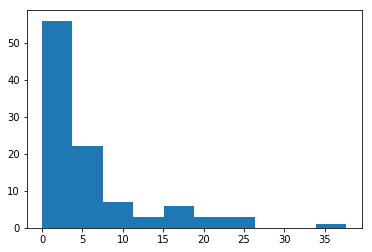

/home/architect/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


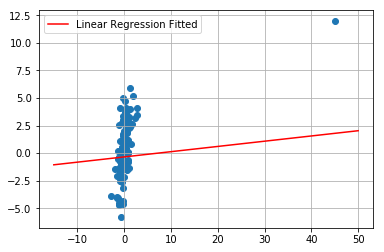

In [38]:
nrow = len(X)
X_stacked= np.column_stack((np.ones(nrow),X))
w_est_2,resid_2,rank,sigma = np.linalg.lstsq(X_stacked, y)
res_error=(np.dot(X_stacked,w_est_2)-y)*(np.dot(X_stacked,w_est_2)-y)
plt.figure()
plt.plot([-15,50],np.dot([[1, -5], [1, 5]],w_est_2),c='red',label='Linear Regression Fitted');
plt.legend()
plt.scatter(X, y);
plt.grid()

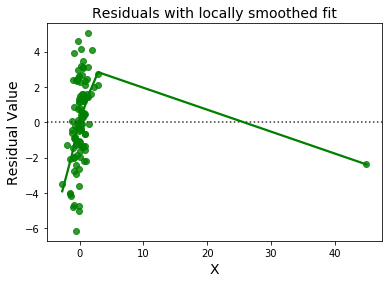

In [37]:
plt.figure()
sns.residplot(X, y, lowess=True, color="g")
plt.xlabel('X',fontsize = 14)
plt.ylabel('Residual Value', fontsize = 14)
plt.title('Residuals with locally smoothed fit', fontsize = 14)
plt.show()

### Q3.1.3 What do you conclude from this example regarding the estimated weight vector and residuals? 

### Q3.1.4 Think of possible strategies to avoid this problem.

Since the 2 weights are different we can see that the method is not very robust to outliers

Q3.1.4
Compute first the function use it to compute the residuals
Assumption that data points with a value higher then a threshold are considered as outliers.
Remove them and compute it new 

(array([56., 22.,  7.,  3.,  6.,  3.,  3.,  0.,  0.,  1.]),
 array([1.03196766e-03, 3.76819826e+00, 7.53536455e+00, 1.13025308e+01,
        1.50696971e+01, 1.88368634e+01, 2.26040297e+01, 2.63711960e+01,
        3.01383623e+01, 3.39055286e+01, 3.76726949e+01]),
 <a list of 10 Patch objects>)

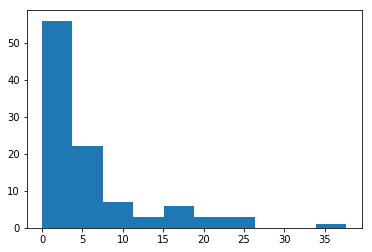

In [49]:
plt.hist(res_error)